Stock Prediction using machine learning

In [1]:
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# Some of the needful packages to import are as follows:

import numpy as np # for statistical analysis and linear algebra
import pandas as pd # for data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for generating graph based solution/prediction
from matplotlib import style
import datetime as dt1  #for real time and date
from datetime import datetime as dt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# kindlu use the path of that folder where are the files are installed.
#here i am using my own local path

from subprocess import check_output
print(check_output(["dir",r"C:\Users\Shubham Jain\Downloads\AsknBid"],shell=True).decode("utf8"))

# Any results you write to the current directory are saved as output.

 Volume in drive C is Acer
 Volume Serial Number is 8807-0C81

 Directory of C:\Users\Shubham Jain\Downloads\AsknBid

17-06-2020  07:35    <DIR>          .
17-06-2020  07:35    <DIR>          ..
16-06-2020  15:55    <DIR>          .ipynb_checkpoints
16-06-2020  15:47         1,414,934 fundamentals.csv
16-06-2020  15:48        52,701,226 prices-split-adjusted.csv
16-06-2020  15:49        51,667,341 prices.csv
16-06-2020  15:48            61,381 securities.csv
17-06-2020  07:35            38,223 stock-prediction.ipynb
16-06-2020  17:06             2,459 Stock_prediction.py
               6 File(s)    105,885,564 bytes
               3 Dir(s)  49,547,952,128 bytes free



In [50]:
df=pd.read_csv('../AsknBid/prices.csv')
df.tail()
df=df.loc[df['symbol'] == 'CSCO']
print(df.tail())


              date symbol       open      close        low       high  \
848874  2016-12-23   CSCO  30.540001  30.530001  30.400000  30.600000   
849374  2016-12-27   CSCO  30.639999  30.680000  30.600000  30.820000   
849874  2016-12-28   CSCO  30.700001  30.420000  30.350000  30.770000   
850374  2016-12-29   CSCO  30.370001  30.459999  30.330000  30.549999   
850874  2016-12-30   CSCO  30.559999  30.219999  30.129999  30.600000   

            volume  
848874   9167500.0  
849374  14175500.0  
849874  12022200.0  
850374  10995600.0  
850874  20190000.0  


In [51]:
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import math

In [52]:
forecast_col = 'close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
print(forecast_out)
df['label'] = df[forecast_col].shift(-forecast_out)
print(df.head())

18
            date symbol       open      close        low       high  \
356   2010-01-04   CSCO  24.110001  24.690001  24.010000  24.840000   
824   2010-01-05   CSCO  24.600000  24.580000  24.379999  24.730000   
1292  2010-01-06   CSCO  24.540001  24.420000  24.340000  24.740000   
1760  2010-01-07   CSCO  24.299999  24.530001  24.170000  24.570000   
2228  2010-01-08   CSCO  24.379999  24.660000  24.250000  24.700001   

          volume      label  
356   59853700.0  22.469999  
824   45124500.0  22.730000  
1292  35715700.0  23.020000  
1760  31531200.0  23.070000  
2228  39115900.0  23.160000  


In [53]:
#X = np.array(df.drop(['label'], 1))

X=np.array(df.drop(['label','symbol','date'], axis=1))
#print(X)
X = preprocessing.scale(X)
#print(X)
X_lately = X[-forecast_out:]
#print(X_lately)
X = X[:-forecast_out]
df.dropna(inplace=True)
y = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [54]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.869800378100227


[29.07107701 29.73244515 29.74828685 29.72256168 29.76788195 30.23177224
 30.35339972 30.26677864 30.15961727 30.40119919 30.34094227 30.15571256
 30.0980011  30.18844674 30.31516529 30.25819768 30.11535924 30.05639587]
2016-12-05
                    date symbol  open  close  low  high  volume  label  \
2016-12-19 00:00:00  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN   
2016-12-20 00:00:00  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN   
2016-12-21 00:00:00  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN   
2016-12-22 00:00:00  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN   
2016-12-23 00:00:00  NaN    NaN   NaN    NaN  NaN   NaN     NaN    NaN   

                      Forecast  
2016-12-19 00:00:00  30.188447  
2016-12-20 00:00:00  30.315165  
2016-12-21 00:00:00  30.258198  
2016-12-22 00:00:00  30.115359  
2016-12-23 00:00:00  30.056396  


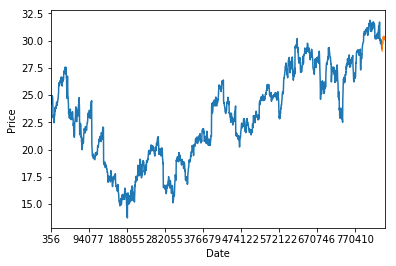

In [55]:
forecast_set = clf.predict(X_lately)
print(forecast_set)
df['Forecast'] = np.nan

last_date = df.iloc[-1].date
print(last_date)
last_date=dt.strptime(last_date, '%Y-%m-%d').timestamp()
last_unix = last_date
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = dt.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

print(df.tail())
df['close'].plot()
df['Forecast'].plot()
#plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()